In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('iris.csv', index_col='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


- Species = 0 Setosa
- Species = 1 Versicolor
- Species = 2 Virginica

In [7]:
df.Species.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [8]:
X = df.iloc[:, 2:-1]

In [9]:
X.head()

,PetalLengthCm,PetalWidthCm
Id,,
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2


In [10]:
df.Species

Id
1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int64

In [11]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=3)

In [12]:
model.fit(X)

KMeans(n_clusters=3, random_state=3)

In [13]:

model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
color = np.array(['red', 'blue', 'green'])

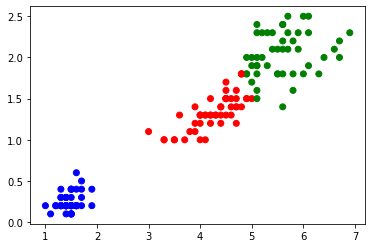

In [16]:
plt.scatter(x=df.PetalLengthCm, y = df.PetalWidthCm, c=color[model.labels_])

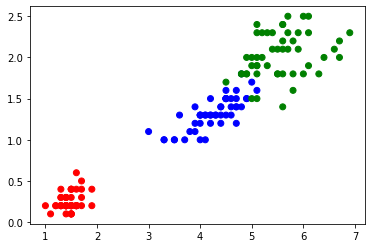

In [17]:
plt.scatter(x=df.PetalLengthCm, y = df.PetalWidthCm, c=color[df.Species])

# elbow method

In [18]:
from scipy.spatial.distance import cdist

In [19]:
X.head()

,PetalLengthCm,PetalWidthCm
Id,,
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2


In [20]:
error = []

In [22]:
for k in range(1,15):
    kmeanmodel = KMeans(n_clusters=k)
    kmeanmodel.fit(X)
    dist = sum(np.min( cdist(X, kmeanmodel.cluster_centers_),axis=1)/X.shape[0] )
    error.append(dist)
    

In [25]:
error

[1.7069324035460889,
 0.584392506331517,
 0.36925710319739746,
 0.29971489163499454,
 0.2655741264274259,
 0.23406659882774242,
 0.21078405460074595,
 0.19722705419580672,
 0.18477635878745705,
 0.1710560026710565,
 0.16787752141074336,
 0.15773344021776248,
 0.15244364457924475,
 0.1485518001014211]

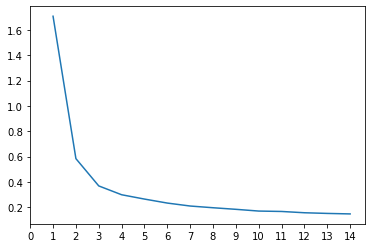

In [24]:
plt.plot(range(1,15),error)
plt.xticks(range(0,15))
plt.show()